#### Credit Risk/Loan Default Classifcation

Using ML algorithms to predict likelihood of loan default based on customer loan data

* Section 1: Data Loading, Exploration, and Cleaning

* Section 2: Exploratory Data Analysis (EDA)

* Section 3: Feature Engineering

* Section 4: Prepare Data For Machine Learning 

* Section 5: Model Machine Learning and Cross Validation

* Section 6: Evaluation (ROC, Confusion Matrix)

* Section 7: Model Explainability (Feature Importance)

* Section 8: Conclusions / Business Insights

### Section 1: Data Loading, Exploration, and Cleaning

#### Data Loading

Import Packages

In [5]:
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#Magic inline command to allow plots to show within Jupyter notebook
%matplotlib inline

Set up Path to Data

In [6]:
#Get project root by going up one directory from notebooks/
PROJECT_ROOT = os.path.abspath("..")

#Define paths
DATA_DIR = os.path.join(PROJECT_ROOT, "data")
RAW_DATA_DIR = os.path.join(DATA_DIR, "raw")
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, "processed")

Read Files

In [7]:
accepted_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "accepted_2007_to_2018Q4.csv", "accepted_2007_to_2018Q4.csv"))

rejected_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "rejected_2007_to_2018Q4.csv", "rejected_2007_to_2018Q4.csv"))

If the above line doesn't work, try this one to read directly from the same file path

In [8]:
"""
accepted_df = pd.read_csv("accepted_2007_to_2018Q4.csv")

rejected_df = pd.read_csv("rejected_2007_to_2018Q4.csv")
"""

'\naccepted_df = pd.read_csv("accepted_2007_to_2018Q4.csv")\n\nrejected_df = pd.read_csv("rejected_2007_to_2018Q4.csv")\n'

Check  to see if the files were properly inputted

In [9]:
accepted_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
rejected_df.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


#### Data Exploration and Cleaning

Start with accepted

In [11]:
#Explore columns
print(accepted_df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)


In [12]:
#Determine which rows to remove based on % of null values
missing_accepted_df = accepted_df.isna().sum().to_frame().rename(columns={0: "count"}).sort_values(by="count", ascending=False)
missing_accepted_df["percentage_null"] = round(missing_accepted_df["count"] / accepted_df.shape[0]*100,2)
missing_accepted_df

,count,percentage_null
member_id,2260701,100.00
orig_projected_additional_accrued_interest,2252050,99.62
hardship_reason,2249784,99.52
hardship_payoff_balance_amount,2249784,99.52
hardship_last_payment_amount,2249784,99.52
...,...,...
total_rec_int,33,0.00
disbursement_method,33,0.00
hardship_flag,33,0.00
debt_settlement_flag,33,0.00


In [13]:
#Remove columns where more than 20% of the values are null
drop_columns = missing_accepted_df[missing_accepted_df["percentage_null"] > 20].index
clean_accepted_df = accepted_df.drop(columns=drop_columns)
clean_accepted_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,...,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,N,Cash,N
2260697,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,...,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Cash,Y
2260698,88215728,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,...,50.0,0.0,0.0,163804.0,44215.0,9500.0,34169.0,N,Cash,N
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Drop duplicates
clean_accepted_df.drop_duplicates(inplace=True)

In [15]:
#Remove inconsistent rows from id
clean_accepted_df["id"] = pd.to_numeric(clean_accepted_df["id"], errors="coerce")
clean_accepted_df.dropna(subset=["id"], inplace=True)
clean_accepted_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277.0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089.0,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763.0,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712.0,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807.0,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,89885898.0,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,C1,Unit Operator,...,NaN,0.0,0.0,102517.0,104422.0,0.0,52017.0,N,Cash,N
2260695,88977788.0,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,Database Administrator,...,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0,N,Cash,N
2260696,88985880.0,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,...,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,N,Cash,N
2260697,88224441.0,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,...,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Cash,Y


In [16]:
#Show all data types for type conversion cleanup
with pd.option_context("display.max_rows", None):
    print(accepted_df.dtypes)

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [17]:
#Change term to a numeric value and remove "months" for later data processing
clean_accepted_df["term"] = clean_accepted_df["term"].str.rstrip(" months").str.strip()
clean_accepted_df["term"] = clean_accepted_df["term"].astype(int)
clean_accepted_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277.0,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089.0,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763.0,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712.0,35000.0,35000.0,35000.0,60,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807.0,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,89885898.0,24000.0,24000.0,24000.0,60,12.79,543.50,C,C1,Unit Operator,...,NaN,0.0,0.0,102517.0,104422.0,0.0,52017.0,N,Cash,N
2260695,88977788.0,24000.0,24000.0,24000.0,60,10.49,515.74,B,B3,Database Administrator,...,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0,N,Cash,N
2260696,88985880.0,40000.0,40000.0,40000.0,60,10.49,859.56,B,B3,Vice President,...,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,N,Cash,N
2260697,88224441.0,24000.0,24000.0,24000.0,60,14.49,564.56,C,C4,Program Manager,...,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Cash,Y


#### Light Feature Engineering and Additional Cleaning

In [18]:
#Map the grade and sub-grades to ordinal values
grade_order_map = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7}
clean_accepted_df["grade_encoded"] = clean_accepted_df["grade"].map(grade_order_map)

subgrade_order_list = [f"{g}{n}" for g in "ABCDEFG" for n in range(1,6)]
subgrade_order_map = {subgrade_order_list: i+1 for i, subgrade_order_list in enumerate(subgrade_order_list)}
clean_accepted_df["subgrade_encoded"] = clean_accepted_df["sub_grade"].map(subgrade_order_map)

In [19]:
#Map employee length
employee_length_map = {
    "10+ years":10,
    "9 years":9,
    "8 years":8,
    "7 years":7,
    "6 years":6,
    "5 years":5,
    "4 years":4,
    "3 years":3,
    "2 years":2,
    "1 year":1,
    "< 1 year":0.5,
    "n/a": 0
}
clean_accepted_df["employee_length_encoded"] = clean_accepted_df["emp_length"].map(employee_length_map)
clean_accepted_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,grade_encoded,subgrade_encoded,employee_length_encoded
0,68407277.0,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,leadman,...,178050.0,7746.0,2400.0,13734.0,N,Cash,N,3,14,10.0
1,68355089.0,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,Engineer,...,314017.0,39475.0,79300.0,24667.0,N,Cash,N,3,11,10.0
2,68341763.0,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,truck driver,...,218418.0,18696.0,6200.0,14877.0,N,Cash,N,2,9,10.0
3,66310712.0,35000.0,35000.0,35000.0,60,14.85,829.90,C,C5,Information Systems Officer,...,381215.0,52226.0,62500.0,18000.0,N,Cash,N,3,15,10.0
4,68476807.0,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,Contract Specialist,...,439570.0,95768.0,20300.0,88097.0,N,Cash,N,6,26,3.0


In [20]:
#Map out year issued
clean_accepted_df["issue_year"]=clean_accepted_df["issue_d"].str[-4:]
clean_accepted_df["issue_year"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: issue_year, dtype: object

In [21]:
#Map region
state_to_region = {
    'CA': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'CO': 'West',
    'NV': 'West', 'AK': 'West', 'MT': 'West', 'HI': 'West', 'WY': 'West', 'ID': 'West',
    'AZ': 'SouthWest', 'TX': 'SouthWest', 'NM': 'SouthWest', 'OK': 'SouthWest',
    'GA': 'SouthEast', 'NC': 'SouthEast', 'VA': 'SouthEast', 'FL': 'SouthEast', 'KY': 'SouthEast',
    'SC': 'SouthEast', 'LA': 'SouthEast', 'AL': 'SouthEast', 'WV': 'SouthEast', 'DC': 'SouthEast',
    'AR': 'SouthEast', 'DE': 'SouthEast', 'MS': 'SouthEast', 'TN': 'SouthEast',
    'IL': 'MidWest', 'MO': 'MidWest', 'MN': 'MidWest', 'OH': 'MidWest', 'WI': 'MidWest',
    'KS': 'MidWest', 'MI': 'MidWest', 'SD': 'MidWest', 'IA': 'MidWest', 'NE': 'MidWest',
    'IN': 'MidWest', 'ND': 'MidWest',
    'CT': 'NorthEast', 'NY': 'NorthEast', 'PA': 'NorthEast', 'NJ': 'NorthEast', 'RI': 'NorthEast',
    'MA': 'NorthEast', 'MD': 'NorthEast', 'VT': 'NorthEast', 'NH': 'NorthEast', 'ME': 'NorthEast'
}
clean_accepted_df["region"] = clean_accepted_df["addr_state"].map(state_to_region)
clean_accepted_df["region"].head()

0    NorthEast
1      MidWest
2      MidWest
3    NorthEast
4    NorthEast
Name: region, dtype: object

In [22]:
#Drop unnecessary columns and repeated features
clean_accepted_df.drop(["emp_length"], axis=1, inplace=True)
clean_accepted_df.drop(["id", "emp_title", "url", "title", "zip_code"], axis=1, inplace=True)

In [23]:
#Fill in missing values

#For object variables - Get the mode of next payment date and last credit pull date
for column in ["last_pymnt_d", "last_credit_pull_d"]:  # , 'income_category'
    clean_accepted_df[column] = clean_accepted_df.groupby("region")[column].transform(lambda x: x.fillna(x.mode()))

#For numerical variables
#Get the median of the number of accounts in which the client is delinquent
clean_accepted_df["pub_rec"] = clean_accepted_df.groupby("region")["pub_rec"].transform(lambda x: x.fillna(x.median()))
#Get the median of the total number of credit lines the borrower has
clean_accepted_df["total_acc"] = clean_accepted_df.groupby("region")["total_acc"].transform(lambda x: x.fillna(x.median()))

#Get the median of the employee length
clean_accepted_df["employee_length_encoded"] = clean_accepted_df.groupby("region")["employee_length_encoded"].transform(lambda x: x.fillna(x.median()))

#Get the mean of the annual income depending on the region the client is located
clean_accepted_df["annual_inc"] = clean_accepted_df.groupby("region")["annual_inc"].transform(lambda x: x.fillna(x.mean()))
#Mean of credit delinquencies in the past two years
clean_accepted_df["delinq_2yrs"] = clean_accepted_df.groupby("region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))


In [24]:
#Assess which columns are numerical and categorical and save them to their own variables.
numerical_columns = clean_accepted_df.select_dtypes("number").columns.tolist()
categorical_columns = clean_accepted_df.select_dtypes("object").columns.tolist()

print(f"There are {len(numerical_columns)} numerical variables in the data set: {numerical_columns}")
print(f"There are {len(categorical_columns)} categorical variables in the data set: {categorical_columns}")

There are 73 numerical variables in the data set: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_o

In [25]:
#Determine loan status outputs
clean_accepted_df["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [26]:
#Map bad laon
bad_loan = ["Charged Off", "In Grace Period", "Default", "Does not meet the credit policy. Status:Charged Off"]
clean_accepted_df["loan_condition_bool"] = clean_accepted_df["loan_status"].apply(lambda status: 1 if status in bad_loan else 0)
clean_accepted_df["loan_condition"] = np.where(clean_accepted_df["loan_condition_bool"] == False, "Good Loan", "Bad Loan")
clean_accepted_df[["loan_condition"]]

,loan_condition
0,Good Loan
1,Good Loan
2,Good Loan
3,Good Loan
4,Good Loan
...,...
2260694,Good Loan
2260695,Good Loan
2260696,Good Loan
2260697,Bad Loan


### Section 2: Exploratory Data Analysis (EDA)

Look at distribution of loan status, income, and default status

In [27]:
#First make a copy of our DataFrame for EDA
eda_df = clean_accepted_df.copy()

#### Information on Loan Condition

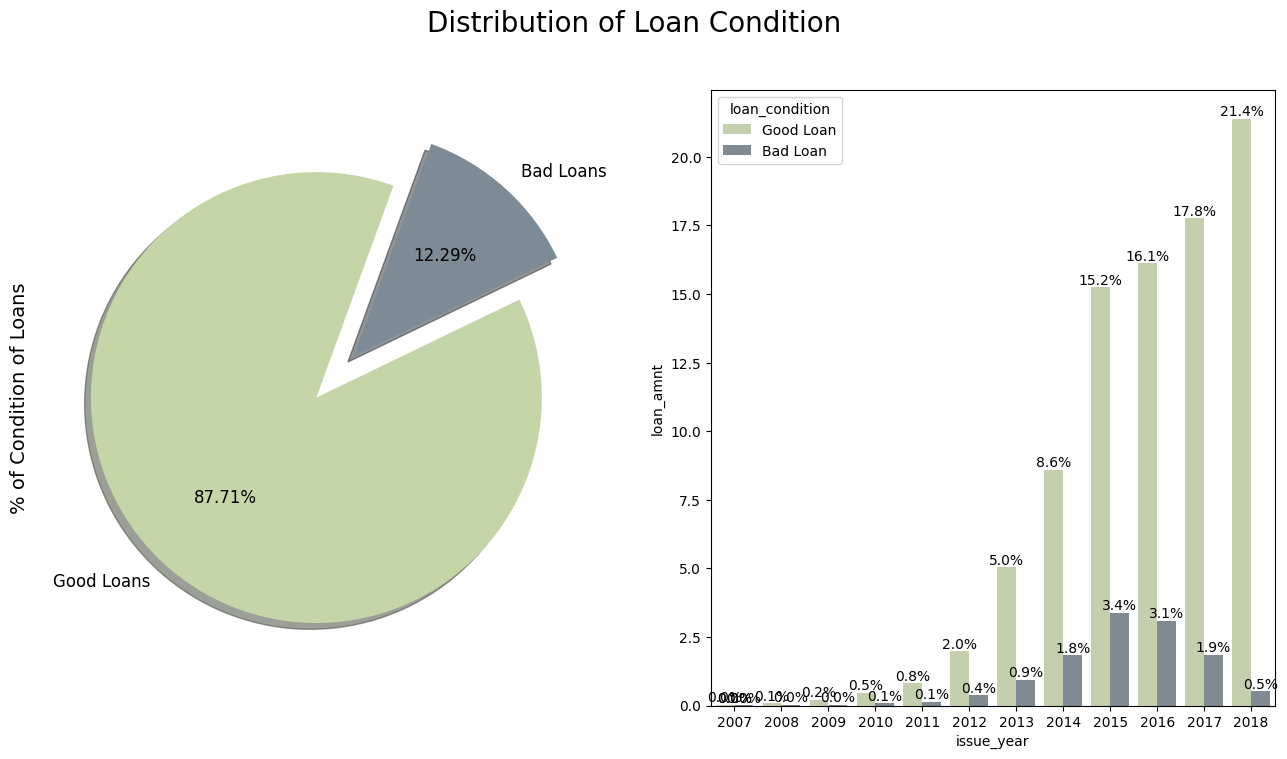

In [28]:
#Plot Loan Condition
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#C4D5A7", "#7C8B95"]
labels = "Good Loans", "Bad Loans"

plt.suptitle("Distribution of Loan Condition", fontsize=20)

eda_df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct="%1.2f%%", 
                                                 ax=ax[0], shadow=True, colors=colors,
                                                 labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel("% of Condition of Loans", fontsize=14)

eda_df = eda_df.sort_values(by="issue_year")

sns.barplot(x="issue_year", y="loan_amnt", hue="loan_condition", data=eda_df, palette=["#C4D5A7", "#7C8B95"],
            estimator=lambda x: len(x) / len(eda_df) * 100)

#Add percentage labels above bars
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black')

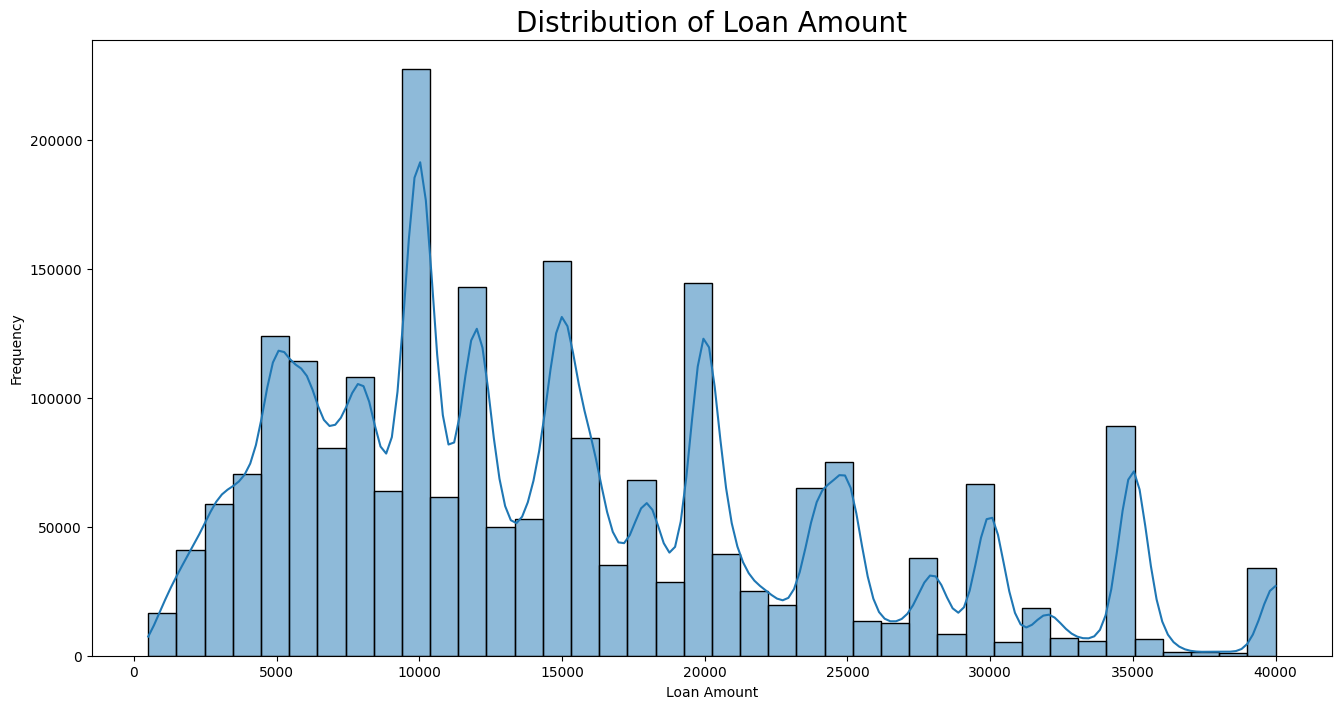

In [29]:
#Loan Amount Distribution
f, ax = plt.subplots(1, figsize=(16,8))

loan_counts = eda_df["loan_amnt"].value_counts().sort_index()
loan_freq_df = loan_counts.reset_index()

sns.histplot(data=eda_df, x="loan_amnt", bins=40, kde=True)
plt.title("Distribution of Loan Amount", fontsize=20)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

plt.show()

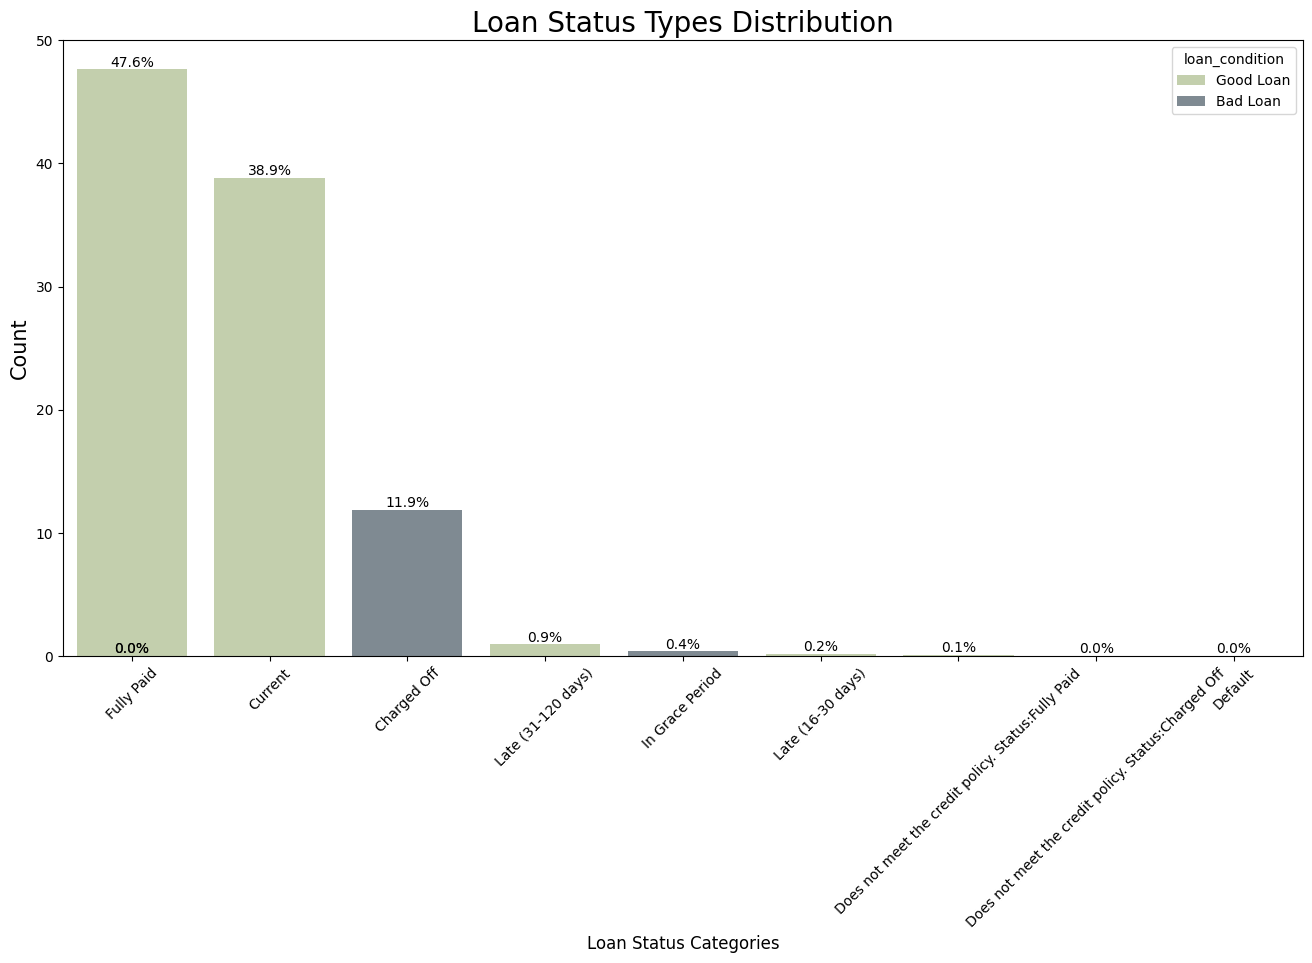

In [30]:
#Default Status Distribution
f, ax = plt.subplots(1, figsize=(16,8))

order = (
    eda_df["loan_status"]
    .value_counts(normalize=True) 
    .sort_values(ascending=False)  
    .index
)

sns.barplot(x="loan_status", y="loan_amnt", data=eda_df, estimator=lambda x: len(x) / len(eda_df) * 100, hue="loan_condition", palette=["#C4D5A7", "#7C8B95"], order=order)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("Loan Status Categories", fontsize=12)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Loan Status Types Distribution", fontsize=20)

#Add percentage labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.show()


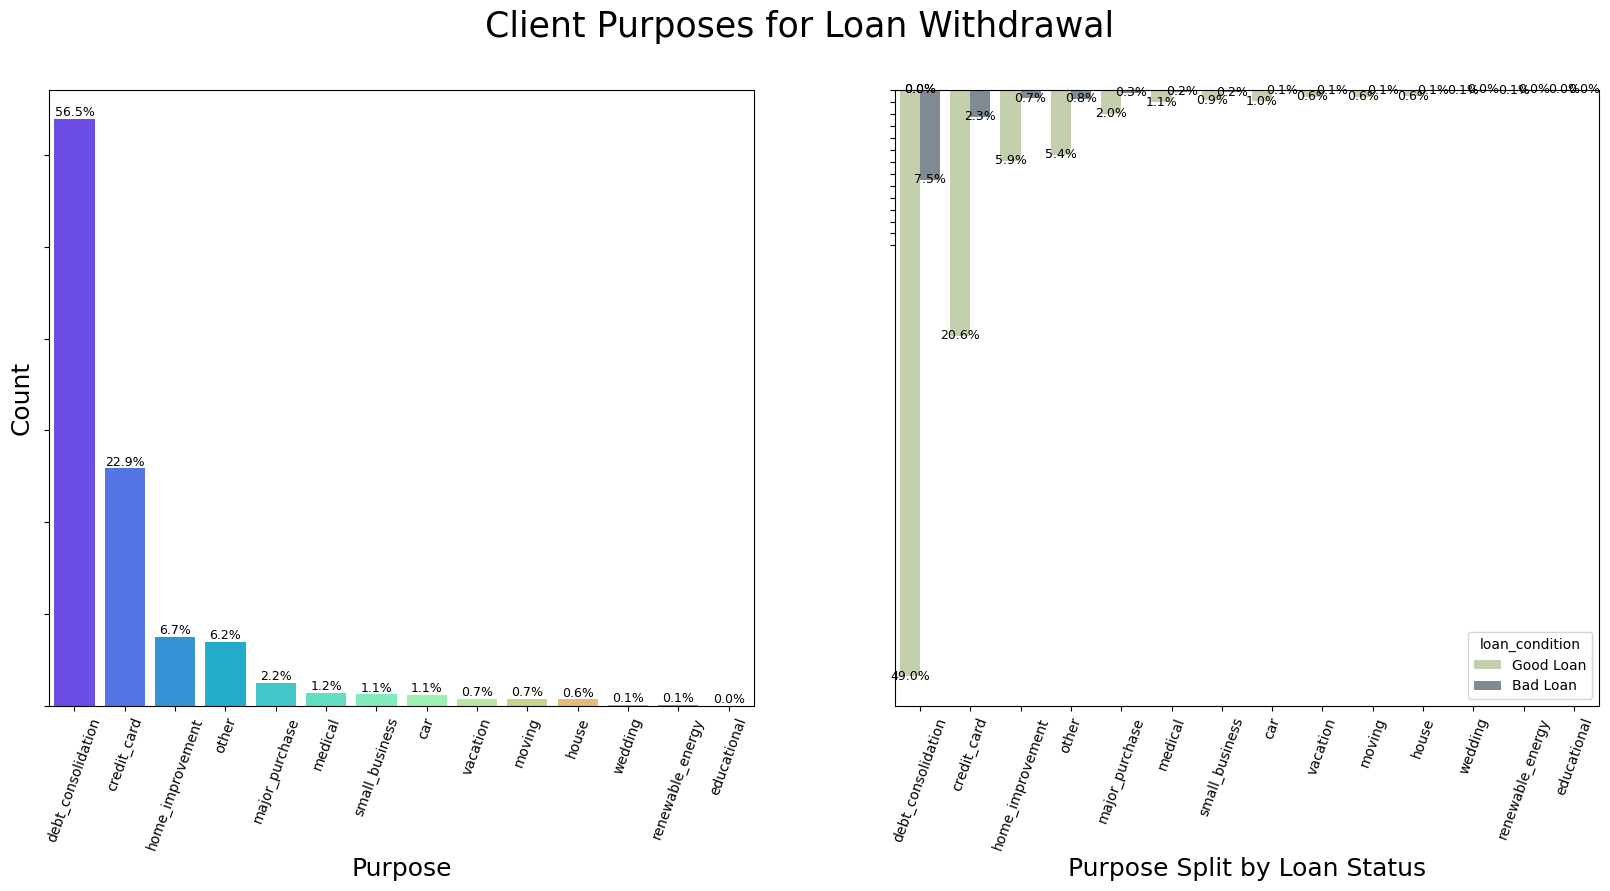

In [31]:
#Client Purpose for Loan Withdrawal
f, ax = plt.subplots(1,2, figsize=(20,8))

plt.suptitle("Client Purposes for Loan Withdrawal", fontsize=25)

#Order purposes by overall frequency
order = (
    eda_df["purpose"]
    .value_counts(normalize=True)
    .sort_values(ascending=False)
    .index
)

sns.countplot(x="purpose", data=eda_df, order=order, palette="rainbow", ax=ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=70)
ax[0].set_xlabel("Purpose", fontsize=18)
ax[0].set_ylabel("Count", fontsize=18)
ax[0].set_yticklabels([]) 

#Add percentage labels above bars
total = len(eda_df)
for p in ax[0].patches:
    height = p.get_height()
    percent = (height / total) * 100  
    ax[0].text(
        p.get_x() + p.get_width() / 2.,
        height + 0.5,                        
        f"{percent:.1f}%",                  
        ha="center", va="bottom", fontsize=9
    )
    
#Plot with hue = loan_condition
sns.barplot(
    x="purpose",
    y="purpose",   
    data=eda_df,
    estimator=lambda x: len(x) / len(eda_df) * 100,
    hue="loan_condition",
    order=order,
    palette=["#C4D5A7", "#7C8B95"],
    ax=ax[1]
)

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=70)
ax[1].set_xlabel("Purpose Split by Loan Status", fontsize=18)
ax[1].set_ylabel("")
ax[1].set_yticklabels([]) 

#Add percentage labels above bars
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(
        p.get_x() + p.get_width() / 2.,
        height + 0.5,                        
        f"{height:.1f}%",                    
        ha="center", va="bottom", fontsize=9)

plt.show()

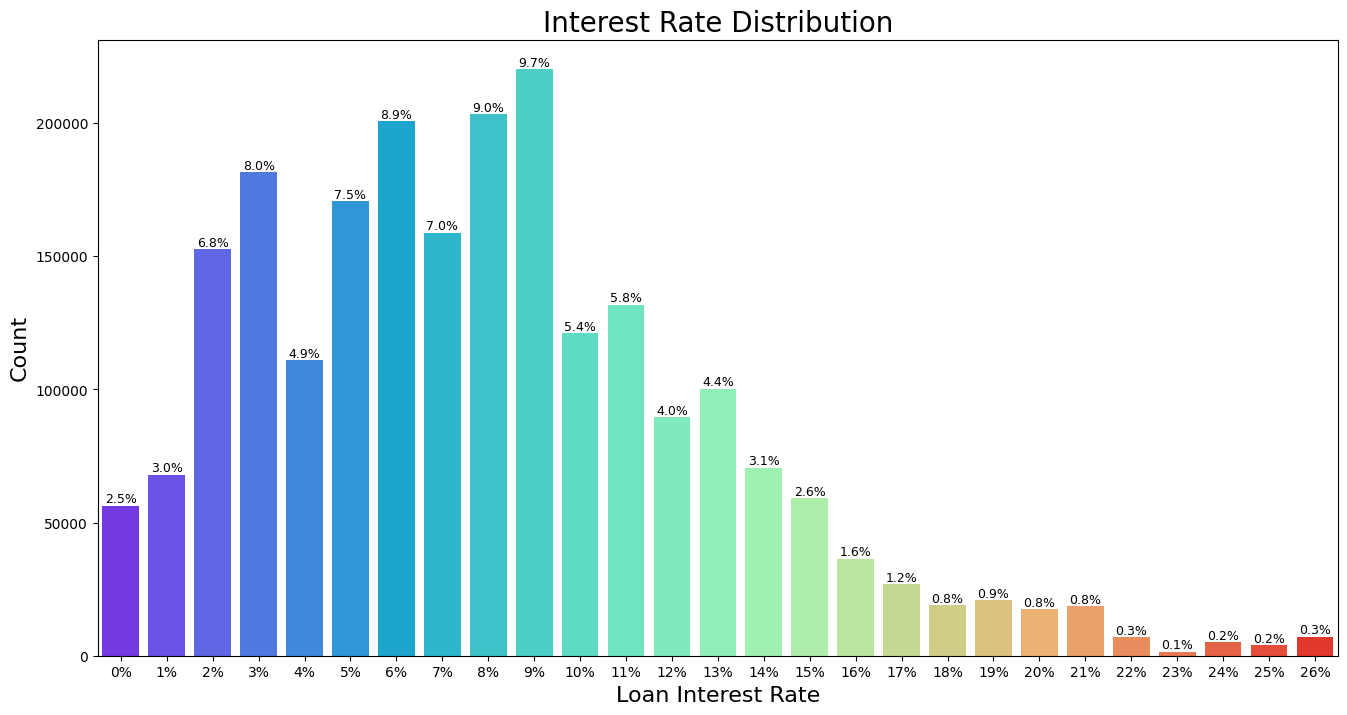

In [32]:
#Interest Rate Distribution
f, ax = plt.subplots(1,1, figsize=(16,8))

eda_df["int_round"] = eda_df["int_rate"].round(0).astype(int)

sns.countplot(x="int_round", data=eda_df, ax=ax, palette="rainbow")
ax.set_xlabel("Loan Interest Rate", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Interest Rate Distribution", fontsize=20)

#Set x labels to end with a % sign
ticks = ax.get_xticks()
ax.set_xticklabels([f"{int(t)}%" for t in ticks])

#Add percentage labels above bars
total = len(eda_df)
for p in ax.patches:
    height = p.get_height()
    percent = (height / total) * 100  
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.5,                        
        f"{percent:.1f}%",                  
        ha="center", va="bottom", fontsize=9
    )
    
plt.show()

In [33]:
eda_df["dti"]

1651552     1.13
1651616    20.00
1651615    20.00
1651614    13.50
1651613     3.45
           ...  
1446799    12.80
1446800    16.83
1446801    12.52
1446833    19.86
1363522    27.28
Name: dti, Length: 2260668, dtype: float64

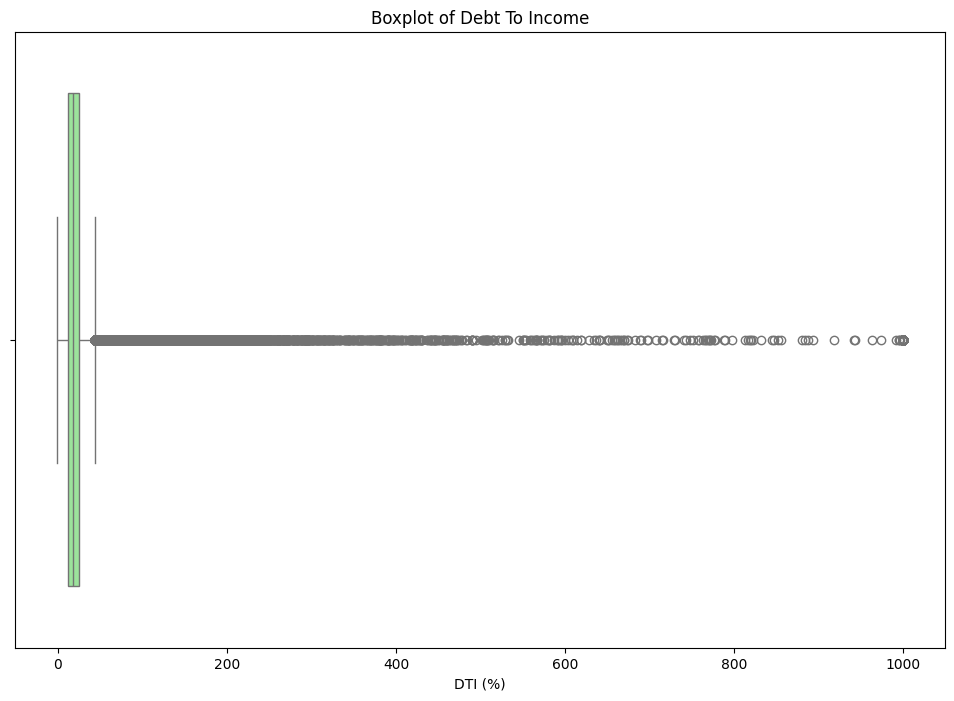

In [34]:
#DTI (Debt over Total Income) Distribution
plt.figure(figsize=(12,8))
sns.boxplot(x=eda_df["dti"], color="lightgreen")
plt.title('Boxplot of Debt To Income')
plt.xlabel('DTI (%)')
plt.show()

#### Correlation Between Features

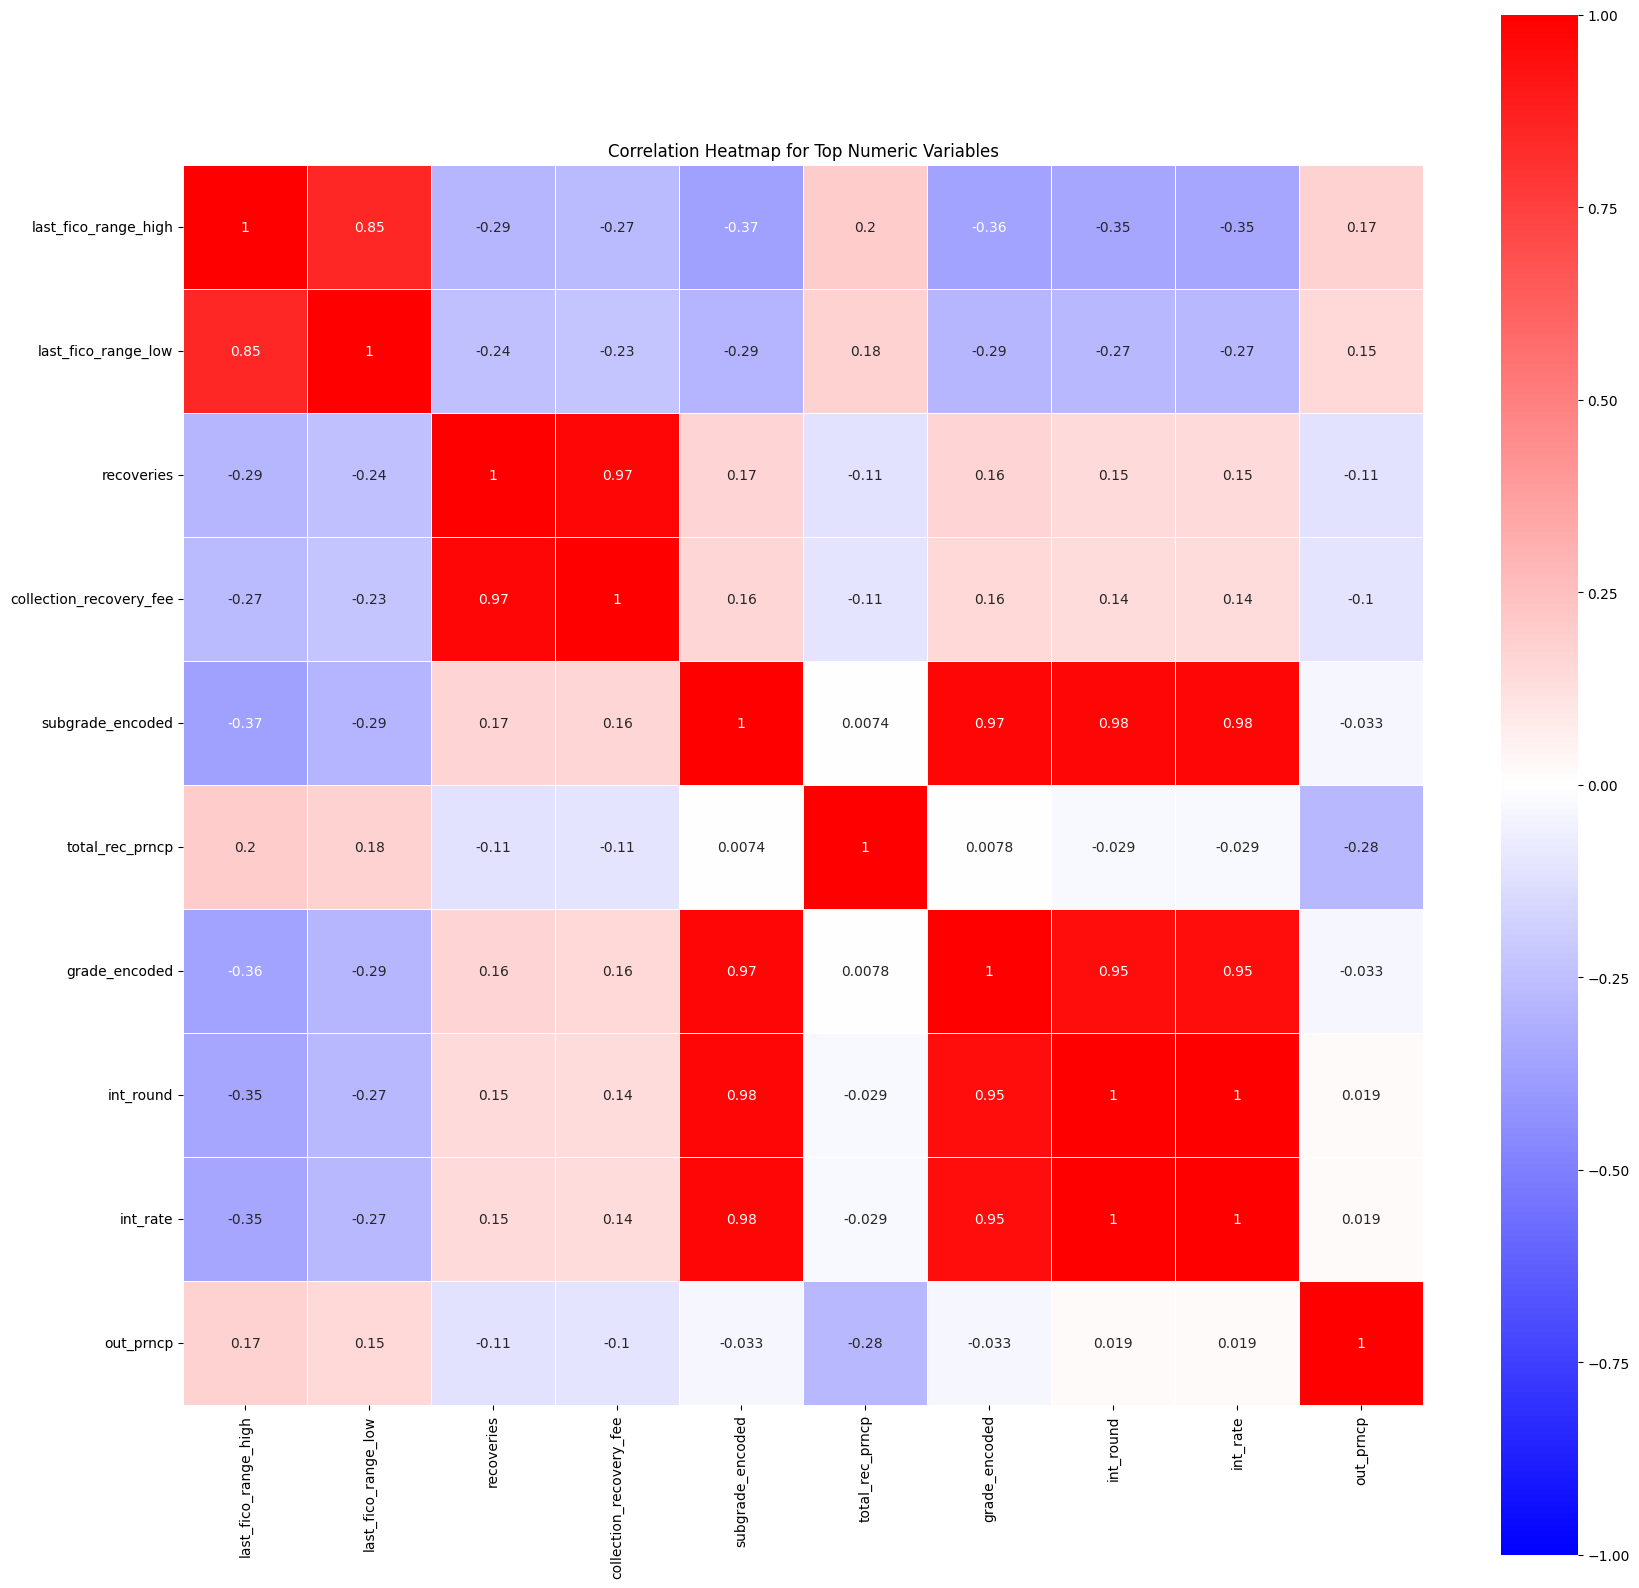

In [35]:
#Correlation Heatmap for Top Numeric Variables
corr_df = eda_df.copy()

correlation_with_loan_condition = corr_df.select_dtypes(include=["int64", "float64"]).corr()["loan_condition_bool"]

sorted_correlation = correlation_with_loan_condition.drop("loan_condition_bool").sort_values(ascending=False)

top_variables = sorted_correlation.abs().nlargest(10).index.tolist()

f, ax = plt.subplots(1,1, figsize=(20,20))
correlation_matrix = eda_df[top_variables].corr()
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap="bwr", vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Heatmap for Top Numeric Variables")
plt.show()

### Section 3: Feature Engineering

In [36]:
#Remove outliers using Isolation Forest to remove 1% of outliers
from sklearn.ensemble import IsolationForest
engineered_df = clean_accepted_df.copy()
print("Data set before removing outlier:", engineered_df.shape)

clf = IsolationForest(contamination=0.01, random_state=51)
engineered_df["outlier"] = clf.fit_predict(engineered_df[numerical_columns])

engineered_df = engineered_df[engineered_df["outlier"] == 1]
engineered_df.drop(columns="outlier", inplace=True)
engineered_df.reset_index(drop=True, inplace=True)

print("Data set after removing outlier:", engineered_df.shape)

engineered_df.head()

Data set before removing outlier: (2260668, 94)
Data set after removing outlier: (2238061, 94)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,hardship_flag,disbursement_method,debt_settlement_flag,grade_encoded,subgrade_encoded,employee_length_encoded,issue_year,region,loan_condition_bool,loan_condition
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,MORTGAGE,55000.0,...,N,Cash,N,3,14,10.0,2015,NorthEast,0,Good Loan
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,MORTGAGE,65000.0,...,N,Cash,N,3,11,10.0,2015,MidWest,0,Good Loan
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,MORTGAGE,63000.0,...,N,Cash,N,2,9,10.0,2015,MidWest,0,Good Loan
3,35000.0,35000.0,35000.0,60,14.85,829.90,C,C5,MORTGAGE,110000.0,...,N,Cash,N,3,15,10.0,2015,NorthEast,0,Good Loan
4,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,MORTGAGE,104433.0,...,N,Cash,N,6,26,3.0,2015,NorthEast,0,Good Loan


In [37]:
engineered_df.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_w

#### Financial Health Ratios:

In [38]:
#Bin DTI to account for skewness
engineered_df["dti_bin"] = pd.qcut(engineered_df["dti"], q=4, labels=["Low", "Medium", "High", "Very High"])

#Loan to Income Ratio
engineered_df["lti"] = engineered_df["loan_amnt"] / engineered_df["annual_inc"]

#Payment to Income Ratio
engineered_df["pti"] = engineered_df["installment"] / (engineered_df["annual_inc"] / 12)

#Already have Revolving Utilization
#engineered_df["revol_util"]

#Credit Revolving Ratios
engineered_df["bal/total_rev"] = engineered_df["revol_bal"] / engineered_df["total_rev_hi_lim"]
engineered_df["bal/credit_lim"] = engineered_df["total_bal_ex_mort"] / engineered_df["total_il_high_credit_limit"]

#### Credit History / Risk Features

In [39]:
#Already have FICO
#engineered_df["fico_range_high"]
#engineered_df["fico_range_low"]

#Change in FICO
engineered_df["change_in_fico"] = engineered_df["last_fico_range_high"] - engineered_df["fico_range_high"]

#Already have Deliquency counts / history
#engineered_df["delinq_2yrs"]
#engineered_df["num_tl_120dpd_2m"]

#Already have bankruptcy Features
#engineered_df["pub_rec_bankruptcies"]
#engineered_df["tax_liens"]

#### Loan Characteristics

In [40]:
#Already have these
#Grade / Sub Grade
#Loan term
#Interest
#Loan issuance date

#### Employment and Demographic Features

In [41]:
#Already mapped employee length
#Already mapped region / state
#Already have Mortgage Type

#### Interaction / Aggregate Features

In [42]:
#DTI x Loan Term to caputre long term risk with high debt
engineered_df["dti*term"] = engineered_df["dti"] * engineered_df["term"]

#PTI x Interest Rate since high payments on high interest loans can increasea default risk
engineered_df["pti&int_rate"] = engineered_df["pti"] * engineered_df["int_rate"]

#Total accounts / Total Balance Exluding Mortgage to capture credit exposure relative to total limits
engineered_df["total_acc/total_bal_ex_mort"] = engineered_df["total_acc"] / engineered_df["total_bal_ex_mort"]

#### Additional Features

In [43]:
#Map out issuance season to capture potential seasonal effects
engineered_df['issue_d'] = pd.to_datetime(engineered_df['issue_d'])

engineered_df['issue_month'] = engineered_df['issue_d'].dt.month

month_to_season = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

engineered_df['issue_season'] = engineered_df['issue_month'].map(month_to_season)

### Section 4: Prepare Data for Machine Learning

#### Create DataFrame to fit to Machine Learning Models

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
#Copy engineered DataFrame for the model DataFrame
model_df = engineered_df.copy()

#Create the binary target variable
model_df['loan_status_target'] = model_df['loan_condition_bool']

#Drop post-loan / datetime features to avoid leakage
drop_cols = [
    'loan_status','loan_condition','loan_condition_bool','last_pymnt_d','last_pymnt_amnt',
    'last_credit_pull_d','last_fico_range_high','last_fico_range_low','total_pymnt','total_pymnt_inv',
    'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
    'issue_d','earliest_cr_line'
]
model_df.drop(columns=[c for c in drop_cols if c in model_df.columns], inplace=True)

#Fill NaNs in categorical variables and one-hot encode
categorical_features = ['home_ownership','grade','sub_grade','purpose','region','verification_status','issue_season']
for col in categorical_features:
    model_df[col] = model_df[col].fillna('Missing')
model_df = pd.get_dummies(model_df, columns=categorical_features, drop_first=True)

#Automatically handle all numeric columns
numeric_cols = model_df.select_dtypes(include=[np.number]).columns.drop('loan_status_target')

#Replace infinities with NaN
model_df[numeric_cols] = model_df[numeric_cols].replace([np.inf, -np.inf], np.nan)

#Fill NaNs with median
model_df[numeric_cols] = model_df[numeric_cols].fillna(model_df[numeric_cols].median())

#Clip extreme values to avoid float64 overflow
clip_threshold = 1e7
model_df[numeric_cols] = model_df[numeric_cols].clip(upper=clip_threshold)

#Scale numeric features
scaler = StandardScaler()
model_df[numeric_cols] = scaler.fit_transform(model_df[numeric_cols])

#Drop any remaining non-numeric columns
non_numeric = model_df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric) > 0:
    print("Dropping non-numeric columns:", list(non_numeric))
    model_df.drop(columns=non_numeric, inplace=True)

#Print results and check
print("Columns ready for modeling:")
print(model_df.columns.values)
print("Any NaNs left?", model_df.isna().sum().sum())
print("Any infinite values left?", np.isinf(model_df[numeric_cols]).sum().sum())

Dropping non-numeric columns: ['pymnt_plan', 'addr_state', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'issue_year', 'dti_bin', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'pur

#### Split Training and Testing Data

In [46]:
#Fit X and y variables
X = model_df.drop(columns="loan_status_target")
y = model_df["loan_status_target"]

In [47]:
#75% train and 25% test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=51)

### Section 5: Model Machine Learning and Cross Validation

In [48]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

#### Logistic Regression

In [49]:
%%time 
lr_model = LogisticRegressionCV(cv=5, penalty="l2", scoring="roc_auc", max_iter=1000, random_state=51)
lr_model.fit(X_train, y_train)

CPU times: total: 3min 26s
Wall time: 29.6 s


,Cs,10
,fit_intercept,True
,cv,5
,dual,False
,penalty,'l2'
,scoring,'roc_auc'
,solver,'lbfgs'
,tol,0.0001
,max_iter,1000
,class_weight,None
,n_jobs,None


In [50]:
#Classification Report and AUC-ROC
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:,1]
lr_model_accuracy = accuracy_score(y_test, y_pred_lr)

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

auc_roc = roc_auc_score(y_test, y_pred_proba_lr)
print(f"AUC-ROC: {auc_roc}")
print(f"Model Accuracy: {lr_model_accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    491340
           1       0.77      0.66      0.71     68176

    accuracy                           0.93    559516
   macro avg       0.86      0.82      0.84    559516
weighted avg       0.93      0.93      0.93    559516

AUC-ROC: 0.9489687015401044
Model Accuracy: 0.93


In [51]:
#Get Baseline Accuracy of the majority class
baseline_accuracy = (len(model_df[model_df["loan_status_target"] == 0]) / (len(model_df["loan_status_target"])))

print(f"Baseline Accuracy (majority class): {baseline_accuracy:.4f}")

#Logistic Regression Accuracy
print(f"Model Accuracy: {lr_model_accuracy:.4f}")

Baseline Accuracy (majority class): 0.8782
Model Accuracy: 0.9341


#### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=16, )

The commented block below is the cross validation for Random Forests, it takes a while to run and ouputs the same result every time, which is marked down below, hence why it's commented out.

In [54]:
"""
#Define model
rf_model = RandomForestClassifier(random_state=51)

#Subset training data for faster processing
subset_size = 50_000
X_train_subset = X_train.sample(n=subset_size, random_state=51)
y_train_subset = y_train.loc[X_train_subset.index]

subset_size = 50_000
X_train_subset, _, y_train_subset, _ = train_test_split(
    X_train, y_train, train_size=subset_size, stratify=y_train, random_state=51)

#Define Random Forest
rf_model = RandomForestClassifier(random_state=51, n_jobs=-1, verbose=1)

#Hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 500),      
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2', None]
}

#Randomized search
rand_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,            
    cv=3,                 
    scoring='roc_auc',
    random_state=51,
)

#Fit on subset
rand_search.fit(X_train_subset, y_train_subset)

#Best parameters and score
print("Best Parameters:", rand_search.best_params_)
print("Best AUC:", rand_search.best_score_)
"""

'\n#Define model\nrf_model = RandomForestClassifier(random_state=51)\n\n#Subset training data for faster processing\nsubset_size = 50_000\nX_train_subset = X_train.sample(n=subset_size, random_state=51)\ny_train_subset = y_train.loc[X_train_subset.index]\n\nsubset_size = 50_000\nX_train_subset, _, y_train_subset, _ = train_test_split(\n    X_train, y_train, train_size=subset_size, stratify=y_train, random_state=51)\n\n#Define Random Forest\nrf_model = RandomForestClassifier(random_state=51, n_jobs=-1, verbose=1)\n\n#Hyperparameter distributions\nparam_dist = {\n    \'n_estimators\': randint(50, 500),      \n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': randint(2, 10),\n    \'min_samples_leaf\': randint(1, 4),\n    \'max_features\': [\'sqrt\', \'log2\', None]\n}\n\n#Randomized search\nrand_search = RandomizedSearchCV(\n    estimator=rf_model,\n    param_distributions=param_dist,\n    n_iter=10,            \n    cv=3,                 \n    scoring=\'roc_auc\',\n    r

Best Parameters from Cross Validation: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 110}

In [55]:
%%time
#Initialize Random Forest model with the best parameters
best_rf = RandomForestClassifier(
    n_estimators=110,
    max_depth=10,
    min_samples_split=7,
    min_samples_leaf=3,
    max_features=None,
    random_state=51,
    n_jobs=-1,
    verbose=1
)

#Fit the model
best_rf.fit(X_train, y_train)

#Predict on test set
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:,1]

rf_model_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc_roc = roc_auc_score(y_test, y_pred_proba_rf)

#Print results
print(f"Random Forest Accuracy: {rf_model_accuracy:.4f}")
print(f"Random Forest AUC-ROC: {rf_auc_roc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  5.3min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 110 out of 110 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s


Random Forest Accuracy: 0.9397
Random Forest AUC-ROC: 0.9570

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97    491340
           1       0.75      0.75      0.75     68176

    accuracy                           0.94    559516
   macro avg       0.86      0.86      0.86    559516
weighted avg       0.94      0.94      0.94    559516

CPU times: total: 1h 18min 1s
Wall time: 5min 19s


[Parallel(n_jobs=16)]: Done 110 out of 110 | elapsed:    0.2s finished


In [56]:
#Get Baseline Accuracy of the majority class
baseline_accuracy = (len(model_df[model_df["loan_status_target"] == 0]) / (len(model_df["loan_status_target"])))

print(f"Baseline Accuracy (majority class): {baseline_accuracy:.4f}")

#Random Forest Accuracy
print(f"Model Accuracy: {rf_model_accuracy:.4f}")

Baseline Accuracy (majority class): 0.8782
Model Accuracy: 0.9397


#### XGBoost

In [57]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

The commented block below is the cross validation for XGBoost, it takes a while to run and ouputs the same result every time, which is marked down below, hence why it's commented out.

In [58]:
"""
#Subset training data with stratification
subset_size = 50_000
X_train_subset, _, y_train_subset, _ = train_test_split(
    X_train, y_train, train_size=subset_size, stratify=y_train, random_state=51
)

#XGBoost classifier with GPU acceleration
xgb_model = xgb.XGBClassifier(
    tree_method='gpu_hist',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=51
)

#Hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225, 250],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

#Use AUC as scoring
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

#RandomizedSearchCV setup
rand_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=150,        #Number of random combinations to try
    scoring=roc_auc_scorer,
    cv=3,             #3-fold stratified CV
    verbose=2,
    random_state=51,
    n_jobs=1          #GPU is used, CPU parallelism not needed
)

#Fit RandomizedSearchCV
rand_search.fit(X_train_subset, y_train_subset)

#Best parameters and CV score
print("Best Parameters:", rand_search.best_params_)
print("Best CV AUC:", rand_search.best_score_)

#Predict on full test set
y_pred = rand_search.predict(X_test)
y_pred_proba = rand_search.predict_proba(X_test)[:, 1]

print(f"Test AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
"""

'\n#Subset training data with stratification\nsubset_size = 50_000\nX_train_subset, _, y_train_subset, _ = train_test_split(\n    X_train, y_train, train_size=subset_size, stratify=y_train, random_state=51\n)\n\n#XGBoost classifier with GPU acceleration\nxgb_model = xgb.XGBClassifier(\n    tree_method=\'gpu_hist\',\n    eval_metric=\'auc\',\n    use_label_encoder=False,\n    random_state=51\n)\n\n#Hyperparameter distributions for RandomizedSearchCV\nparam_dist = {\n    \'max_depth\': [2, 3, 4, 5, 6, 7, 8],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],\n    \'n_estimators\': [50, 75, 100, 125, 150, 175, 200, 225, 250],\n    \'subsample\': [0.7, 0.8, 0.9, 1.0],\n    \'colsample_bytree\': [0.7, 0.8, 0.9, 1.0]\n}\n\n#Use AUC as scoring\nroc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)\n\n#RandomizedSearchCV setup\nrand_search = RandomizedSearchCV(\n    estimator=xgb_model,\n    param_distributions=param_dist,\n    n_iter=150,        #Number of random combinations t

Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.7}


In [59]:
%%time

#Fit XGBoost Model with the best parameters
best_xgb = xgb.XGBClassifier(random_state=51, use_label_encoder=False, eval_metric="auc", tree_method="gpu_hist", subsample=1.0, 
    n_estimators=125, max_depth=4, learning_rate=0.2, colsample_bytree=0.7)
best_xgb.fit(X_train, y_train)

y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:,1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
xgb_model_accuracy = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"XGBoost ROC AUC: {roc_auc_xgb}")
print(f"XGBoost Accuracy: {xgb_model_accuracy:.2f}")

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    491340
           1       0.76      0.75      0.76     68176

    accuracy                           0.94    559516
   macro avg       0.86      0.86      0.86    559516
weighted avg       0.94      0.94      0.94    559516

XGBoost ROC AUC: 0.9596522266715606
XGBoost Accuracy: 0.94
CPU times: total: 19.5 s
Wall time: 2.37 s


In [60]:
#Get Baseline Accuracy of the majority class
baseline_accuracy = (len(model_df[model_df["loan_status_target"] == 0]) / (len(model_df["loan_status_target"])))

print(f"Baseline Accuracy (majority class): {baseline_accuracy:.4f}")

#XGBoost Accuracy
print(f"Model Accuracy: {xgb_model_accuracy:.4f}")

Baseline Accuracy (majority class): 0.8782
Model Accuracy: 0.9416


### Section 6: Evaluation (ROC, Confusion Matrix)


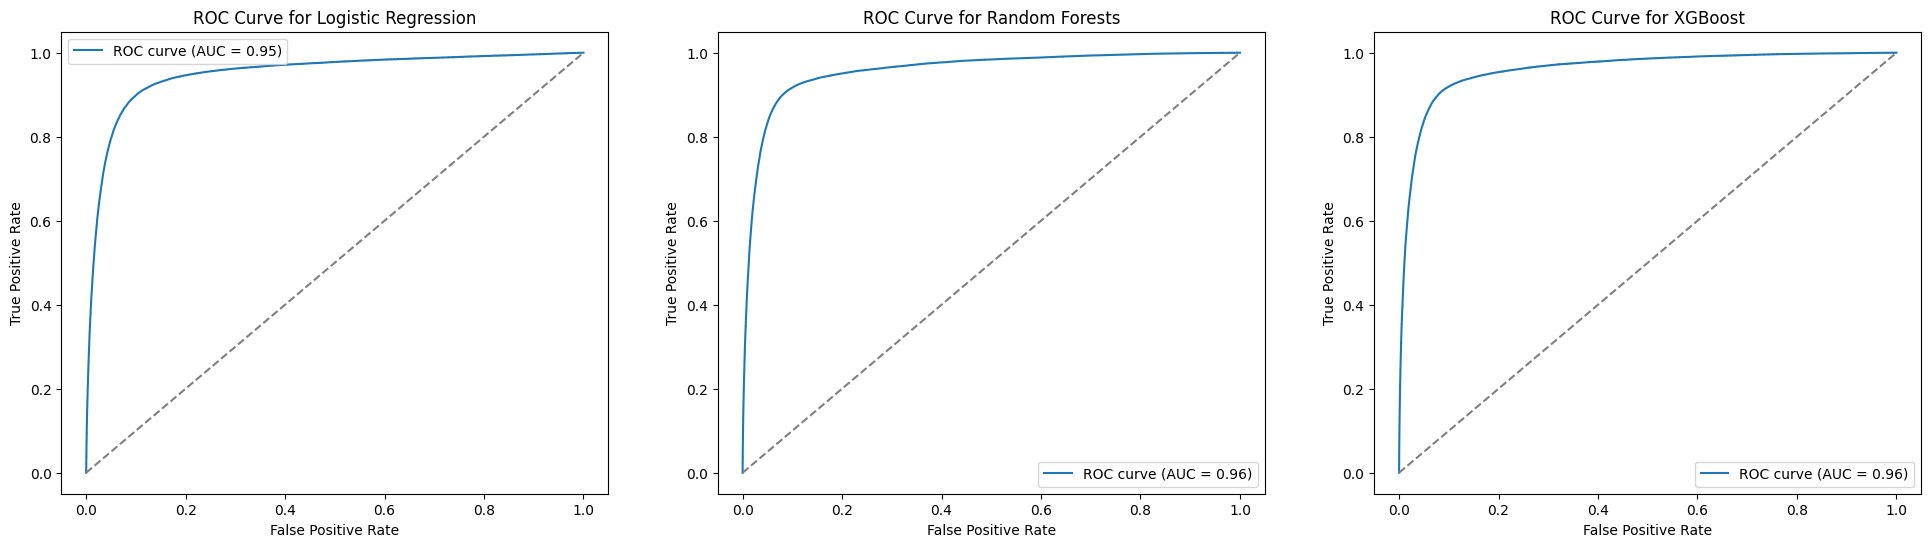

In [61]:
#ROC Curve Comparison
f, ax = plt.subplots(1,3, figsize=(24,6))

#Calculate AUC for each model
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)


#ROC Curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
ax[0].plot(fpr, tpr, label=f"ROC curve (AUC = {auc_lr:.2f})")
ax[0].plot([0, 1], [0, 1], linestyle="--", color="gray") 
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].set_title("ROC Curve for Logistic Regression")
ax[0].legend()

#ROC Curve for Random Forests
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
ax[1].plot(fpr, tpr, label=f"ROC curve (AUC = {auc_rf:.2f})")
ax[1].plot([0, 1], [0, 1], linestyle="--", color="gray")
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].set_title("ROC Curve for Random Forests")
ax[1].legend()

#ROC Curve for XGBoost
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
ax[2].plot(fpr, tpr, label=f"ROC curve (AUC = {auc_xgb:.2f})")
ax[2].plot([0, 1], [0, 1], linestyle="--", color="gray")
ax[2].set_xlabel("False Positive Rate")
ax[2].set_ylabel("True Positive Rate")
ax[2].set_title("ROC Curve for XGBoost")
ax[2].legend()

plt.show()

Text(0, 0.5, 'True Values')

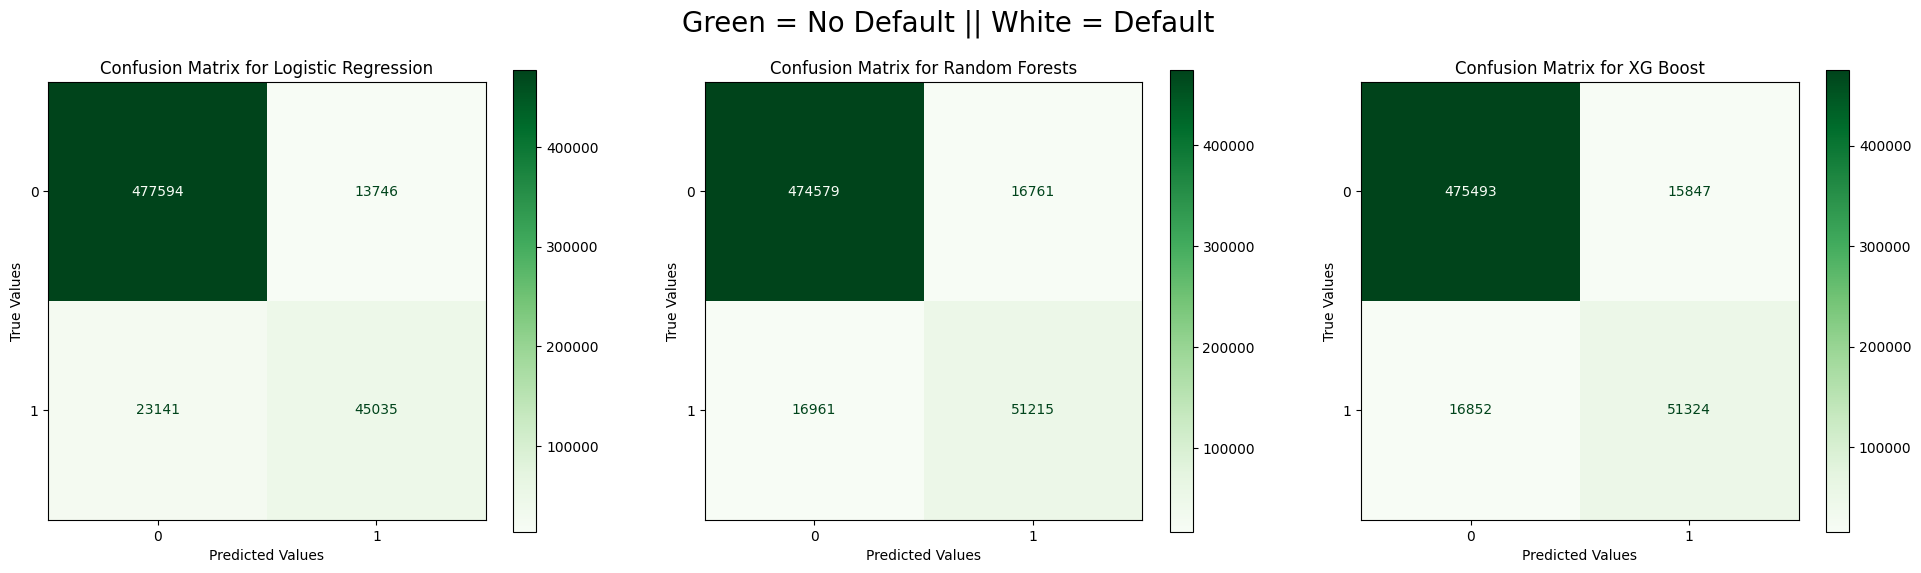

In [62]:
#Confusion Matrix Comparison
f, ax = plt.subplots(1,3, figsize=(24,6))

f.suptitle("Green = No Default || White = Default", fontsize=20)

#Confusion Matrix for Logistic Regression
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens", ax=ax[0], colorbar=True,)
ax[0].set_title("Confusion Matrix for Logistic Regression")
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("True Values")

#Confusion Matrix for Logistic Regression
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens", ax=ax[1], colorbar=True,)
ax[1].set_title("Confusion Matrix for Random Forests")
ax[1].set_xlabel("Predicted Values")
ax[1].set_ylabel("True Values")

#Confusion Matrix for Logistic Regression
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens", ax=ax[2], colorbar=True,)
ax[2].set_title("Confusion Matrix for XG Boost")
ax[2].set_xlabel("Predicted Values")
ax[2].set_ylabel("True Values")

XGBoost seems to be the best predictive model as it has higher True Positives/Negatives and lower False Positives/Negatives. This is crucial in a business where you do not want to miss out on a client but at the same time taking on a client that will default will bring massive losses. 

### Section 7: Model Explainability (Feature Importance)

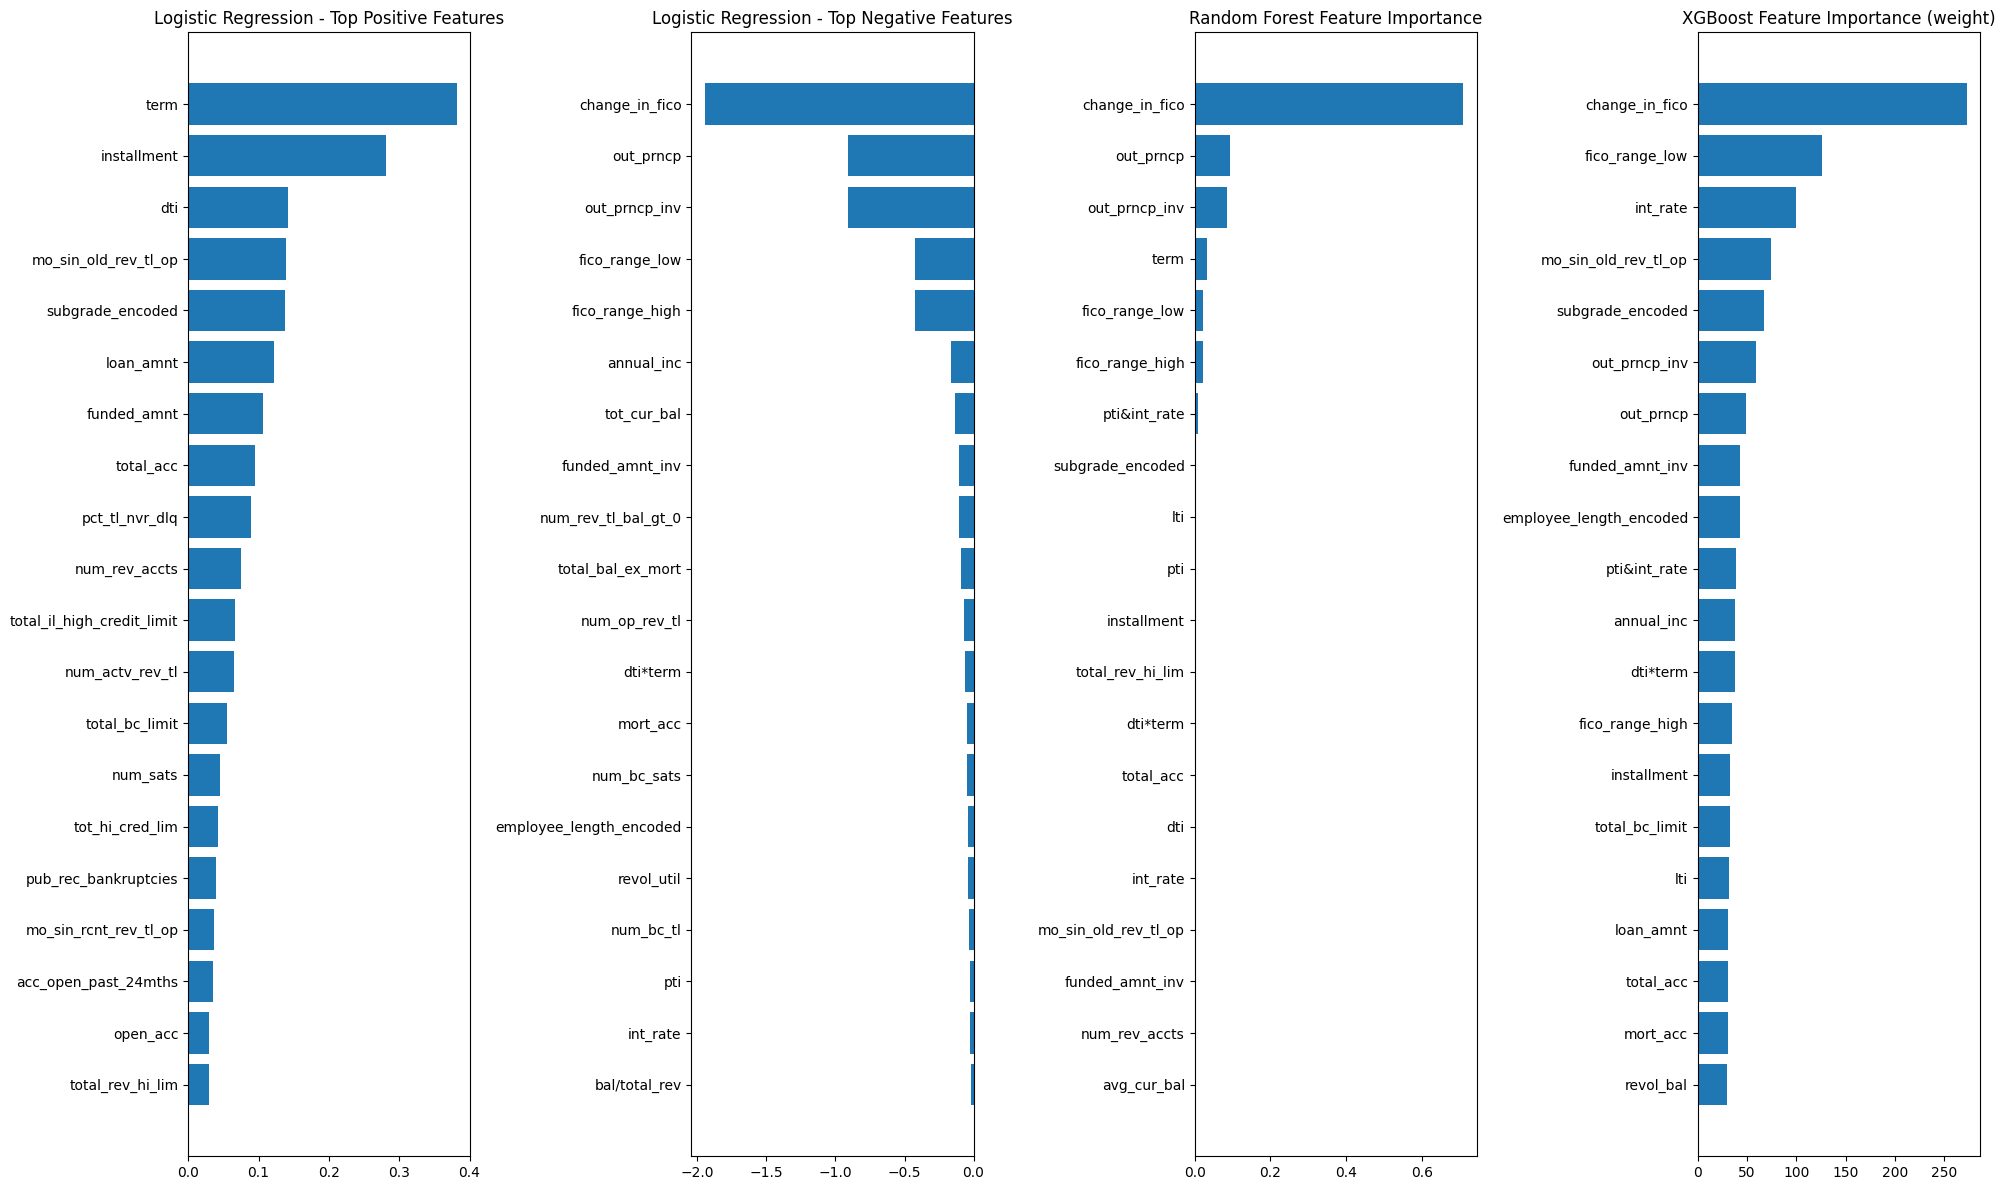

In [63]:
#Show top 20 features
TOP_N = 20

#Logistic Regression importance
coefs = dict(zip(X_train.columns, lr_model.coef_[0]))

# Sort separately by positive and negative
top_pos_lr = dict(sorted(coefs.items(), key=lambda item: item[1], reverse=True)[:TOP_N])
top_neg_lr = dict(sorted(coefs.items(), key=lambda item: item[1])[:TOP_N])

#Random Forest importance
importance_rf = dict(zip(X_train.columns, best_rf.feature_importances_))
importance_rf = dict(sorted(importance_rf.items(), key=lambda item: item[1], reverse=True)[:TOP_N])

#XGBoost importance
importance_xgb = best_xgb.get_booster().get_score(importance_type='weight')
importance_xgb = dict(sorted(importance_xgb.items(), key=lambda item: item[1], reverse=True)[:TOP_N])


fig, ax = plt.subplots(1, 4, figsize=(20, 12))

#Logistic Regression - Positive
ax[0].barh(list(top_pos_lr.keys()), list(top_pos_lr.values()))
ax[0].set_title("Logistic Regression - Top Positive Features")
ax[0].invert_yaxis()

#Logistic Regression - Negative
ax[1].barh(list(top_neg_lr.keys()), list(top_neg_lr.values()))
ax[1].set_title("Logistic Regression - Top Negative Features")
ax[1].invert_yaxis()

#Random Forest
ax[2].barh(list(importance_rf.keys()), list(importance_rf.values()))
ax[2].set_title("Random Forest Feature Importance")
ax[2].invert_yaxis()

#XGBoost
ax[3].barh(list(importance_xgb.keys()), list(importance_xgb.values()))
ax[3].set_title("XGBoost Feature Importance (weight)")
ax[3].invert_yaxis()

plt.tight_layout()
plt.show()


### Section 8 Conclusion/Business Insights:

Our custom change in fico feature had the most impact in predicting performance across all 3 models. Some other features are given impportance throughout all models such as out principal, dti*term, fico range high & low, but with different priorities throughout all three models.

The Logistic Regression model shows directionally for default and no default features. Random Forest/XGBoost shows non linear importance, revealing which features in general has the most weight.


For Risk Management, I would suggest to monitor FICO scores and changes in FICO score closely and pay attention to multiple appearances of high risk measures in a client such as a high debt-to-income ratio and high principal amounts.